In [1]:
#!pip3 install squarify
import  squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpt 
import warnings 
warnings.filterwarnings('ignore')
# pd.set_option('max_row', 10)
facecolor = '#262626'


In [2]:
from IPython.core.display import HTML


def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")


Loading Dataset

In [3]:
d=pd.read_csv('ds_salaries.csv')
d.drop(['Unnamed: 0'],axis=1,inplace=True)


In [4]:
d.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


EDA and Feature Engineering

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [6]:
multi_table([pd.DataFrame(d[col].value_counts())
            for col in d.columns])


,work_year
2022,318
2021,217
2020,72
,experience_level
SE,280
MI,213
EN,88
EX,26
,employment_type
FT,588


In [7]:
col_ordinal = ['work_year', 'remote_ratio', 'company_size']
col_norminal = d.columns[d.columns.map(
    lambda x: x not in col_ordinal and d[x].dtype == 'object')].values
col_continuous = ['salary', 'salary_in_usd']


In [8]:
print(f'ordinal vars: {col_ordinal}')
print(f'norminal vars: {col_norminal}')
print(f'continuous vars: {col_continuous}')


ordinal vars: ['work_year', 'remote_ratio', 'company_size']
norminal vars: ['experience_level' 'employment_type' 'job_title' 'salary_currency'
 'employee_residence' 'company_location']
continuous vars: ['salary', 'salary_in_usd']


 Preprocessing
 
 1.Check missing values
 2.Create Derivative Variables

In [9]:
print(f'missing count: {d.isnull().sum().sum()}')


missing count: 0


No missing values.😄😄

In [10]:
num_job = d.job_title.nunique()
num_occupation = d.job_title.map(lambda x: x.split(' ')[-1]).nunique()

print(f'the number of job: {num_job}')
print(f"the number of occupations: {num_occupation}")


the number of job: 50
the number of occupations: 14


In [11]:
d['occupation'] = d['job_title'].map(
    lambda x: x.split(' ')[-1])
d.loc[d['job_title'].map(
    lambda x: 'Lead' in x), 'occupation'] = 'Leader'
d.loc[d['job_title'].map(
    lambda x: 'Head' in x), 'occupation'] = 'Leader'
d.loc[d['job_title'].map(
    lambda x: 'Specialist' in x), 'occupation'] = 'Leader'
d.loc[d['job_title'].map(
    lambda x: 'Director' in x), 'occupation'] = 'Leader'


In [12]:
d['occupation'].value_counts()


Engineer      216
Scientist     191
Analyst       116
Leader         34
Manager        25
Architect      12
Consultant      7
Developer       5
Researcher      1
Name: occupation, dtype: int64

In [13]:
d.loc[d['experience_level']=='EN', 'experience_level'] = 'Junior'
d.loc[d['experience_level']=='MI', 'experience_level'] = 'Mid'
d.loc[d['experience_level']=='SE', 'experience_level'] = 'Senior'
d.loc[d['experience_level']=='EX', 'experience_level'] = 'Expert'

d.loc[d['employment_type']=='PT', 'employment_type'] = 'Part'
d.loc[d['employment_type']=='FT', 'employment_type'] = 'Full'
d.loc[d['employment_type']=='CT', 'employment_type'] = 'Contract'
d.loc[d['employment_type']=='FL', 'employment_type'] = 'Freelance'

In [14]:
d.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,occupation
0,2020,Mid,Full,Data Scientist,70000,EUR,79833,DE,0,DE,L,Scientist
1,2020,Senior,Full,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Scientist
2,2020,Senior,Full,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Engineer
3,2020,Mid,Full,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Analyst
4,2020,Senior,Full,Machine Learning Engineer,150000,USD,150000,US,50,US,L,Engineer


Univariate / Bivariate Explore


In [15]:
d1=d.copy()

 Occupation :  First of all, I checked the distribution of occupational groups. This variable is a nominal variable. I used the pie chart earlier, so I'll use the bar chart this time

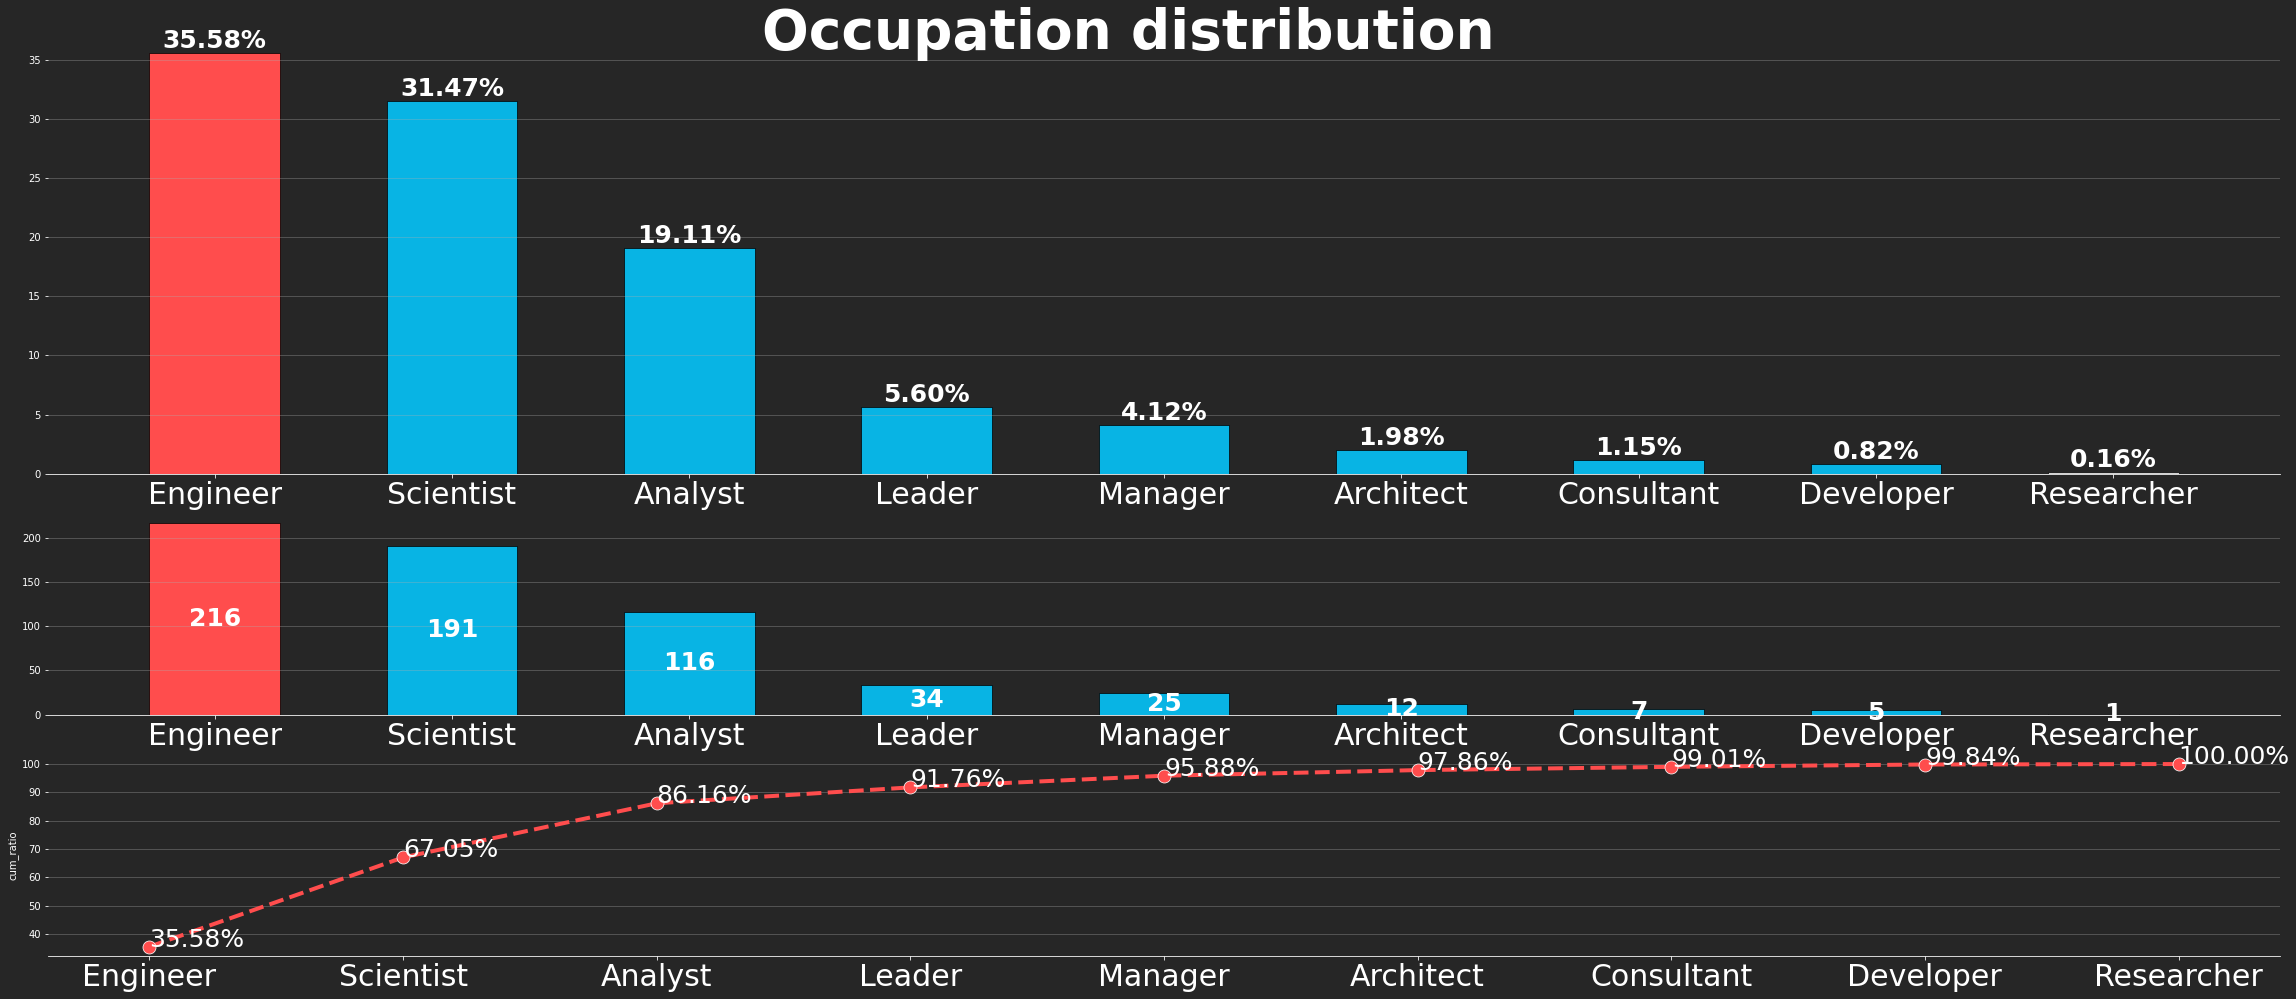

In [16]:
# Data -------------------------------------------------------------------------------------------------------
df_fig = pd.DataFrame(d['occupation'].value_counts().sort_values(ascending=False))
df_fig['ratio'] = df_fig['occupation'] / d.shape[0] * 100
df_fig['cum_ratio'] = 0
df_fig.loc[df_fig.index == df_fig.index[0], 'cum_ratio'] = df_fig.iloc[0]['ratio']
for i in range(1, df_fig.shape[0]):
    df_fig.loc[df_fig.index == df_fig.index[i], 'cum_ratio'] = df_fig.iloc[i]['ratio'] + df_fig.iloc[i-1]['cum_ratio']
    
# Setting 01 -------------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(40, 17))
gs = fig.add_gridspec(4, 4)
ax = [fig.add_subplot(gs[:2,:]), fig.add_subplot(gs[2,:]), fig.add_subplot(gs[3:,:])]
colors_temp = ['#ff4d4d'] + ['#08B4E4'] * (df_fig.shape[0] - 2) + ['lightgray']
fig.set_facecolor(facecolor)

# Draw -------------------------------------------------------------------------------------------------------
g = ax[0].bar(df_fig.index, df_fig.ratio, width=.55, edgecolor='black', linewidth=.7, color=colors_temp)
ax[0].bar_label(g, fmt='%.2f%%', size=25, color='white', fontweight='bold')

g = ax[1].bar(df_fig.index, df_fig['occupation'], width=0.55, edgecolor='black', linewidth=0.7, color=colors_temp)
ax[1].bar_label(g, fmt='%d', label_type='center', color='white', size=25, fontweight='bold')

sns.lineplot(x=df_fig.index, y=df_fig['cum_ratio'], ax=ax[2], ls='--', linewidth=4, marker='o', markersize=13, color=colors_temp[0])
[ax[2].annotate(f"{df_fig.iloc[i]['cum_ratio']:,.2f}%", (df_fig.index[i], df_fig.iloc[i]['cum_ratio']), size=25, color='white') for i in range(df_fig.shape[0])]

# Setting 02 -------------------------------------------------------------------------------------------------------
for a in ax:
    a.spines[['top', 'right', 'left']].set_visible(False)
    a.set_facecolor(facecolor)
    a.xaxis.label.set_color('white')  
    a.yaxis.label.set_color('white')
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')
    a.spines['left'].set_color('white')
    a.spines['bottom'].set_color('white') 
    a.tick_params(axis='x', labelsize=30)
    a.grid(axis='y', linestyle='-', alpha=0.4)


plt.suptitle('Occupation distribution', size=55, color='white', y=.9, fontweight='bold')
plt.show()

 Experience Level  : What is the percentage of career experience for each worker in the given data? This is a nominal variable, so you can see the distribution in the pie chart.

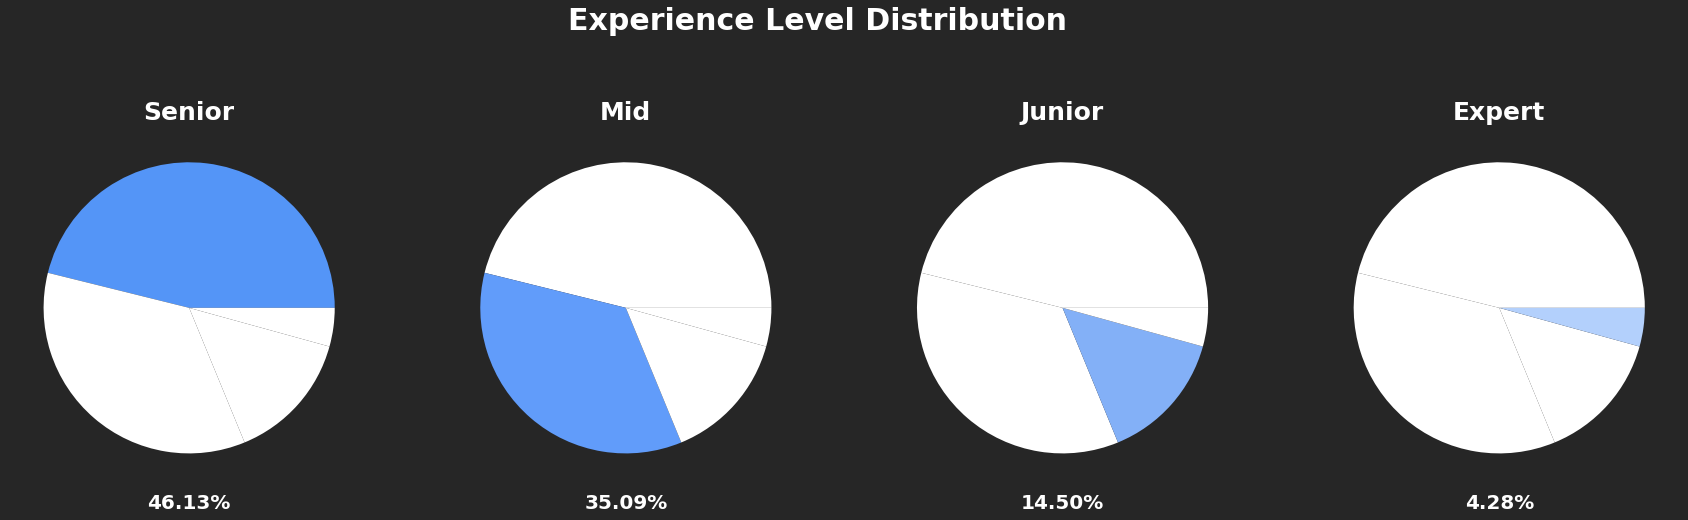

In [17]:
# Data -----------------------------------------------------------------------------
colors_blue = ['#5495f7', '#619cfa', '#83b0f7', '#b3d0fc']
df_fig = d1['experience_level'].value_counts()
df_fig_size = len(df_fig)

# # Setting 01 -----------------------------------------------------------------------------
f, ax = plt.subplots(1, 4, figsize=(30, 7))
f.set_facecolor(facecolor)

# # Draw -----------------------------------------------------------------------------
for i in range(df_fig_size):
    colors_temp = ['white'] * df_fig_size
    colors_temp[i] = colors_blue[i]
    ax[i].pie(df_fig, colors=colors_temp)
    ax[i].set_title(df_fig.index[i], fontweight='bold', size=25, color='white')
    ax[i].set_xlabel(f'{df_fig[i] / d.shape[0] * 100:.2f}%',
                     fontweight='bold', size=20, color='white')


# # Setting 02 -----------------------------------------------------------------------------
f.suptitle('Experience Level Distribution', size=30,
           color='white', fontweight='bold', y=1.1)

plt.show()


Experience and Occupation : Let's check the distribution of occupational groups according to experience. We can use the bacht (a) to visualize the relationship between two categorical variables.
In addition, I visualized the change in the proportion of each occupation group through the line chart (b)

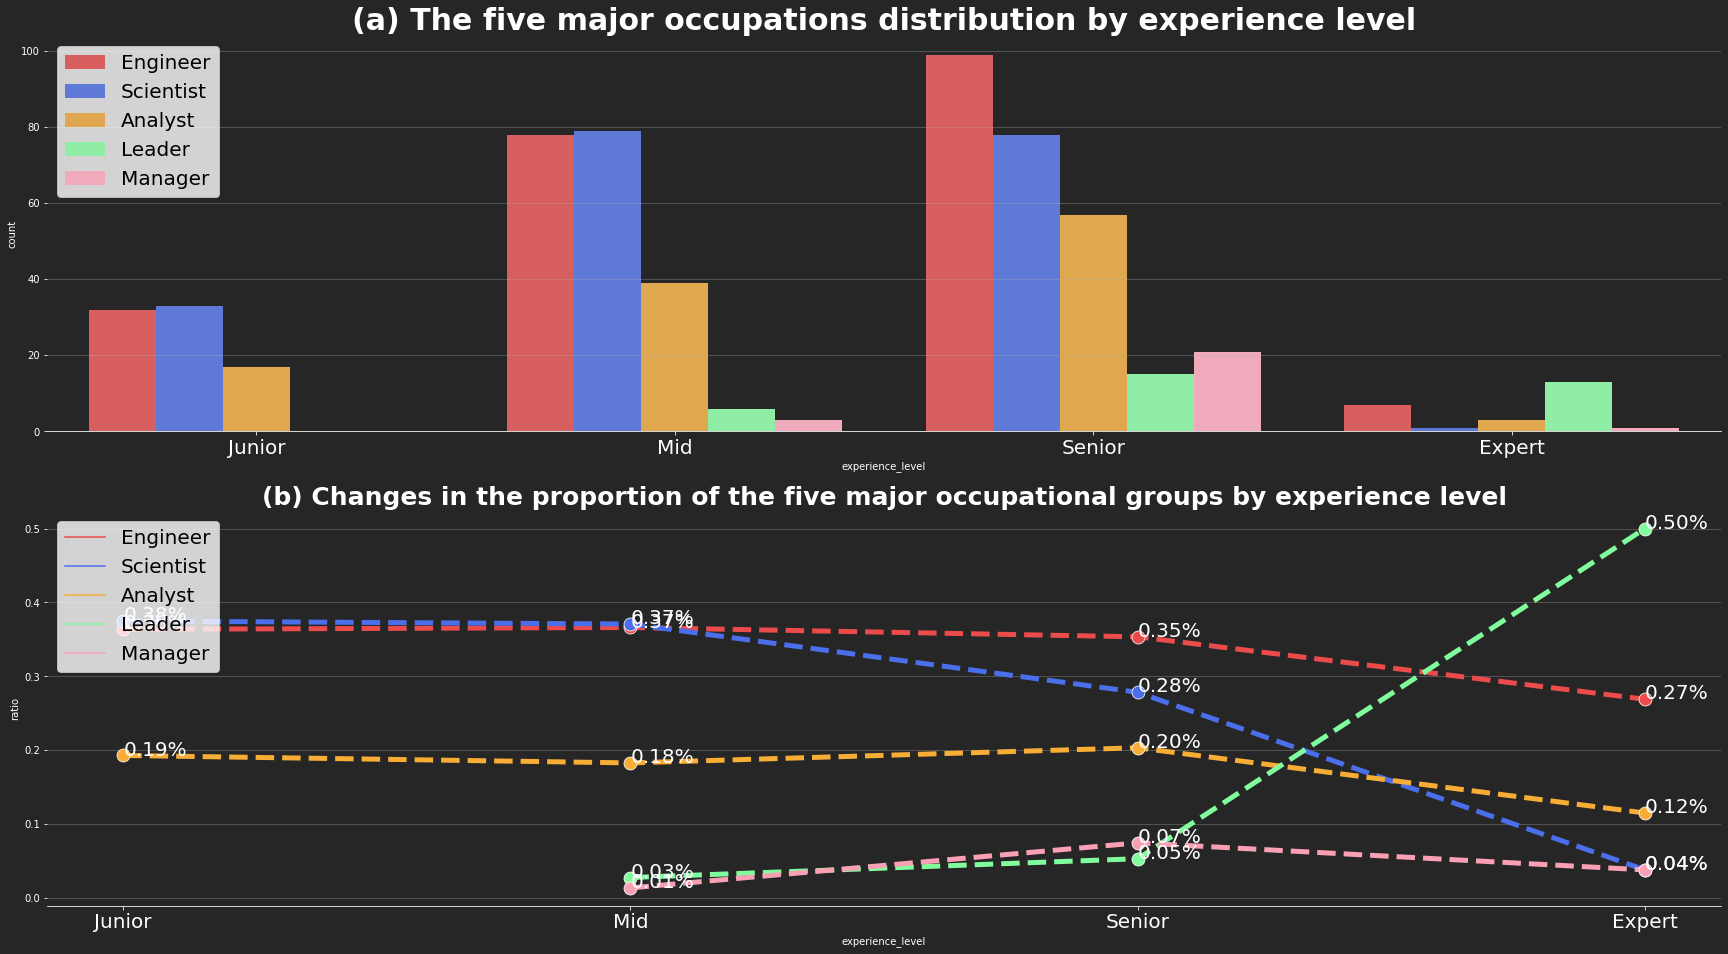

In [18]:
# Data ------------------------------------------------------------------------------------------
rank = 5
d1['occupation_rank'] = d1['occupation'].map(lambda x: np.where(
    x == d1['occupation'].value_counts().index.values)[0][0])
dic_ex = {'Junior': 0, 'Mid': 1, 'Senior': 2, 'Expert': 3}
d1['ex_id'] = d1.experience_level.map(lambda x: dic_ex[x])

df_fig = d1[d1['occupation_rank'] < rank].sort_values(
    'ex_id').sort_values('occupation_rank').reset_index(drop=True)

df_fig2 = pd.DataFrame(df_fig.groupby(['experience_level', 'occupation'])[
                       'occupation_rank'].value_counts())
df_fig2.rename(columns={'occupation_rank': 'num'}, inplace=True)
df_fig2 = df_fig2.reset_index()
df_fig2['ex_id'] = df_fig2.experience_level.map(lambda x: dic_ex[x])
df_fig2 = df_fig2.sort_values(by=['occupation_rank', 'ex_id'])
df_fig2['ratio'] = df_fig2['num'] / df_fig2['experience_level'].map(
    lambda x: d1['experience_level'].value_counts()[x])

# Setting 01 ------------------------------------------------------------------------------------------
f = plt.figure(figsize=(30, 16))
gs = f.add_gridspec(2, 1)
ax = [f.add_subplot(gs[:1, :]), f.add_subplot(gs[1:, :])]
f.set_facecolor(facecolor)
colors_temp = ['#eb4b4b', '#4b6eeb', '#f7ad36', '#81fc9c', '#faa0b5']

# Draw ------------------------------------------------------------------------------------------
sns.countplot(data=df_fig, x='experience_level',
              hue='occupation', palette=colors_temp, ax=ax[0])
sns.lineplot(data=df_fig2, x='experience_level', y='ratio', hue='occupation',
             palette=colors_temp, ls='--', linewidth=5, marker='o', markersize=13, ax=ax[1])
[ax[1].annotate(f"{df_fig2.iloc[i]['ratio']:,.2f}%", (df_fig2.iloc[i]['experience_level'],
                df_fig2.iloc[i]['ratio']), size=20, color='white') for i in range(df_fig2.shape[0])]

# Setting 02 ------------------------------------------------------------------------------------------
for a in ax:
    a.spines[['top', 'right', 'left']].set_visible(False)
    a.set_facecolor(facecolor)
    a.xaxis.label.set_color('white')
    a.yaxis.label.set_color('white')
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')
    a.spines['left'].set_color('white')
    a.spines['bottom'].set_color('white')
    a.tick_params(axis='x', labelsize=20)
    a.grid(axis='y', linestyle='-', alpha=0.4)
    a.legend(fontsize=20, loc='upper left')

ax[0].set_title('(a) The five major occupations distribution by experience level',
                size=30, fontweight='bold', color='white')
ax[1].set_title('(b) Changes in the proportion of the five major occupational groups by experience level',
                size=25, fontweight='bold', color='white')

plt.show()


In [19]:
df_fig2

,experience_level,occupation,occupation_rank,num,ex_id,ratio
6,Junior,Engineer,0,32,0,0.363636
9,Mid,Engineer,0,78,1,0.366197
14,Senior,Engineer,0,99,2,0.353571
1,Expert,Engineer,0,7,3,0.269231
7,Junior,Scientist,1,33,0,0.375000
12,Mid,Scientist,1,79,1,0.370892
17,Senior,Scientist,1,78,2,0.278571
4,Expert,Scientist,1,1,3,0.038462
5,Junior,Analyst,2,17,0,0.193182
8,Mid,Analyst,2,39,1,0.183099


Employment Type : Now let's look at the distribution of employment. Since this variable is a categorical variable, we used the bar chart and the pie chart.

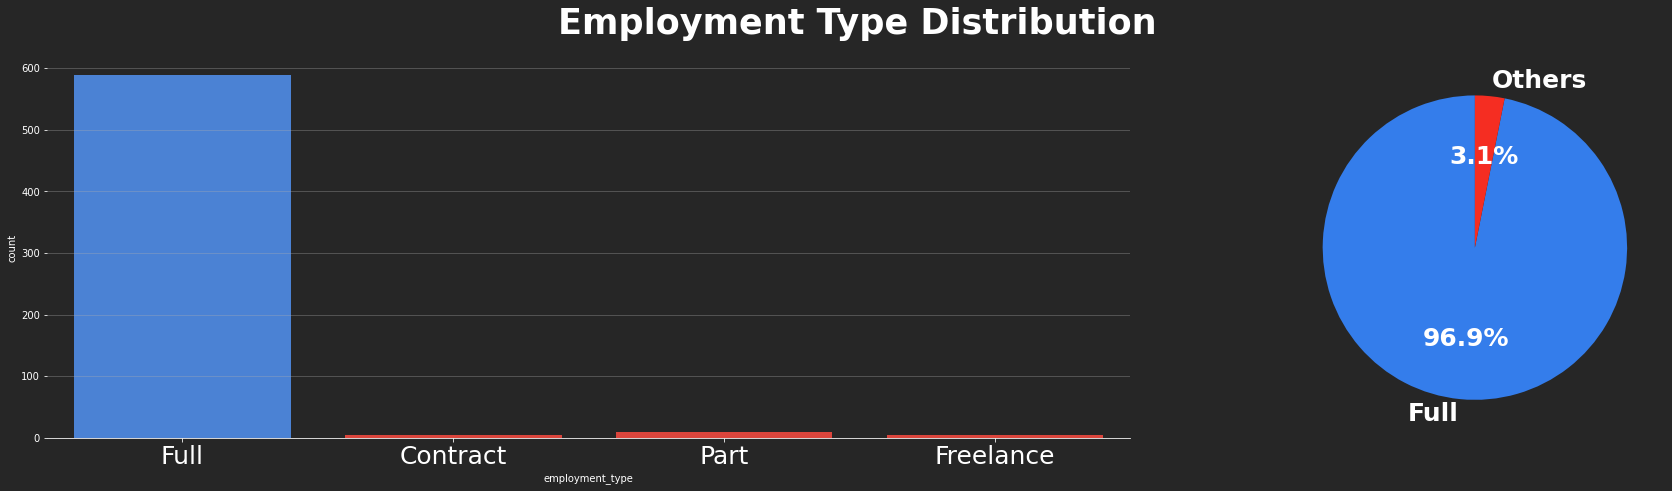

In [21]:
# Setting 01 ----------------------------------------------------------------------
f = plt.figure(figsize=(30, 7))
gs = f.add_gridspec(1, 3)
ax = [f.add_subplot(gs[:, :2]), f.add_subplot(gs[:, 2:])]
f.set_facecolor(facecolor)
colors_temp = ['#347deb'] + ['#f52d22'] * \
    (d1['employment_type'].nunique() - 1)

# Data ----------------------------------------------------------
cnt_ft = d1[d['employment_type'] == 'Full'].shape[0]
df_fig = pd.Series({'Full': cnt_ft, 'Others': d1.shape[0]-cnt_ft})

# Draw ----------------------------------------------------------
sns.countplot(d['employment_type'], ax=ax[0], palette=colors_temp)
ax[1].pie(df_fig, labels=df_fig.index, autopct='%1.1f%%', startangle=90, textprops={
          'fontsize': 25, 'color': 'white', 'fontweight': 'bold'}, colors=colors_temp)

# Setting 02 ----------------------------------------------------------------------
for a in ax:
    a.spines[['top', 'right', 'left']].set_visible(False)
    a.set_facecolor(facecolor)
    a.xaxis.label.set_color('white')
    a.yaxis.label.set_color('white')
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')
    a.spines['left'].set_color('white')
    a.spines['bottom'].set_color('white')
    a.tick_params(axis='x', labelsize=25)
    a.grid(axis='y', linestyle='-', alpha=0.4)

f.suptitle('Employment Type Distribution', size=35,
           fontweight='bold', color='white')
plt.show()


Experience and Occupation by Employment Type : We previously confirmed in Section 4.4 that most (about 98%) of the workers were full-time. Therefore, the trend of Experience Level and Occupation in full-time workers is not expected to be much different from the previous one.
Then, what about the distribution of Experience and Occupation if you are not a full-time worker?

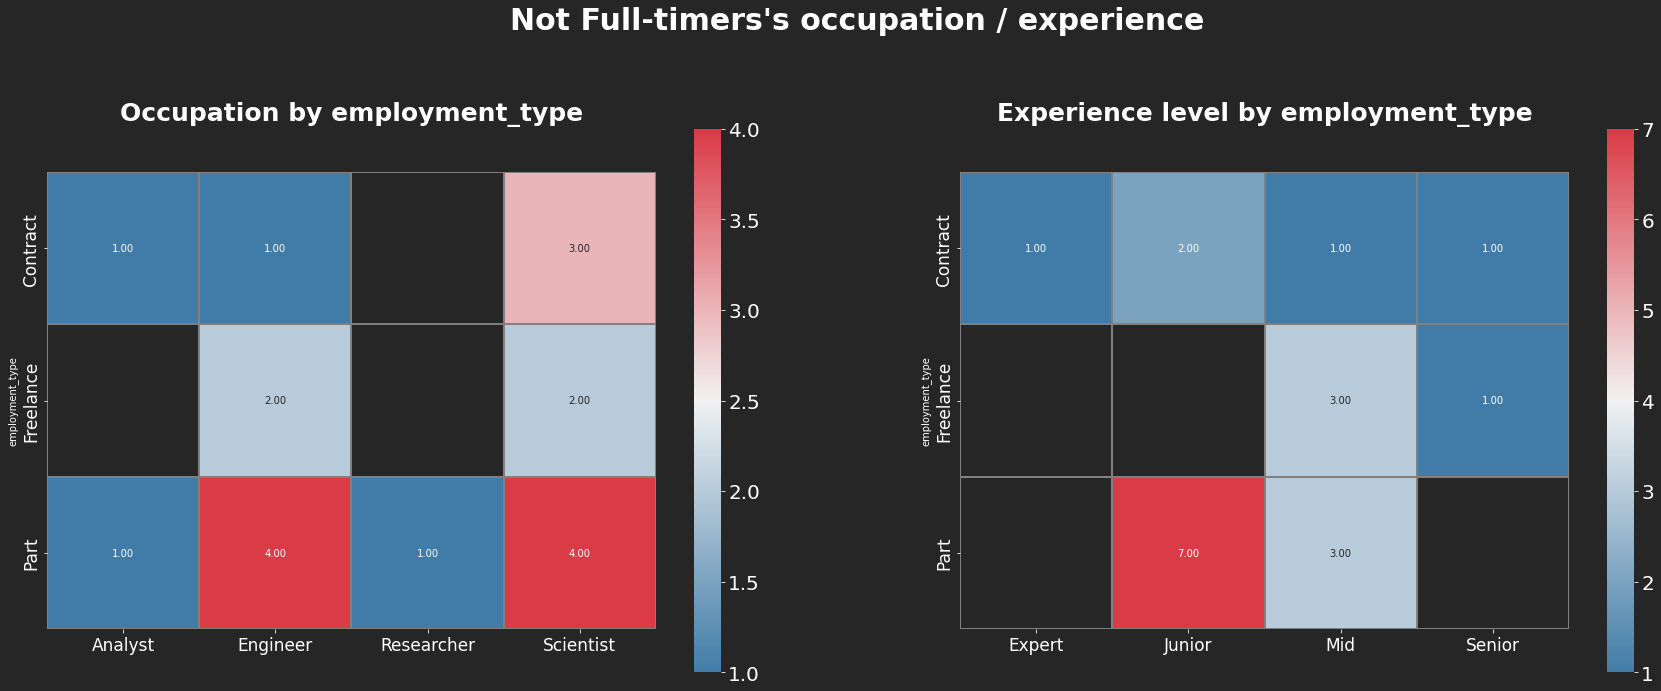

In [23]:
# Setting 01 ---------------------------------------------------------------------
f, ax = plt.subplots(1, 2, figsize=(30, 10))
f.set_facecolor(facecolor)

# Data ---------------------------------------------------------------------------
df_notfull = d1[d1['employment_type'] != 'Full']
df_fig1 = pd.pivot_table(data=df_notfull[['occupation', 'occupation_rank', 'employment_type']],
                         index='employment_type', columns='occupation', aggfunc='count')
df_fig2 = pd.pivot_table(data=df_notfull[['experience_level', 'ex_id', 'employment_type']],
                         index='employment_type', columns='experience_level', aggfunc='count')
df_fig1.columns = [df_fig1.columns[i][1] for i in range(len(df_fig1.columns))]
df_fig2.columns = [df_fig2.columns[i][1] for i in range(len(df_fig2.columns))]

# Draw ---------------------------------------------------------------------------
sns.heatmap(df_fig1, square=True, annot=True, fmt='.2f', linewidth=2, linecolor='gray',
            cbar_kws={'orientation': 'vertical'}, cmap=sns.diverging_palette(240, 10, as_cmap=True), ax=ax[0])
sns.heatmap(df_fig2, square=True, annot=True, fmt='.2f', linewidth=2, linecolor='gray',
            cbar_kws={'orientation': 'vertical'}, cmap=sns.diverging_palette(240, 10, as_cmap=True), ax=ax[1])

# Setting 02 ----------------------------------------------------------------------
for a in ax:
    a.spines[['top', 'right', 'left']].set_visible(False)
    a.set_facecolor(facecolor)
    a.xaxis.label.set_color('white')
    a.yaxis.label.set_color('white')
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')
    a.spines['left'].set_color('white')
    a.spines['bottom'].set_color('white')
    a.tick_params(axis='x', labelsize=17)
    a.tick_params(axis='y', labelsize=17)
    a.collections[0].colorbar.ax.tick_params(labelsize=20, colors='white')

ax[0].set_title('Occupation by employment_type', color='white',
                fontweight='bold', size=25, y=1.1)
ax[1].set_title('Experience level by employment_type',
                color='white', fontweight='bold', size=25, y=1.1)

plt.suptitle("Not Full-timers's occupation / experience",
             color='white', fontweight='bold', size=30, y=1.05)
plt.show()


Employee Residence and Company location : The location of the company is expected to be almost the same as the area where they live. These are categorical variables, so you can check the distribution using a bar chart.
You can visualize and compare the distribution of your region and company location together. Because there are so many areas, eight major areas were selected

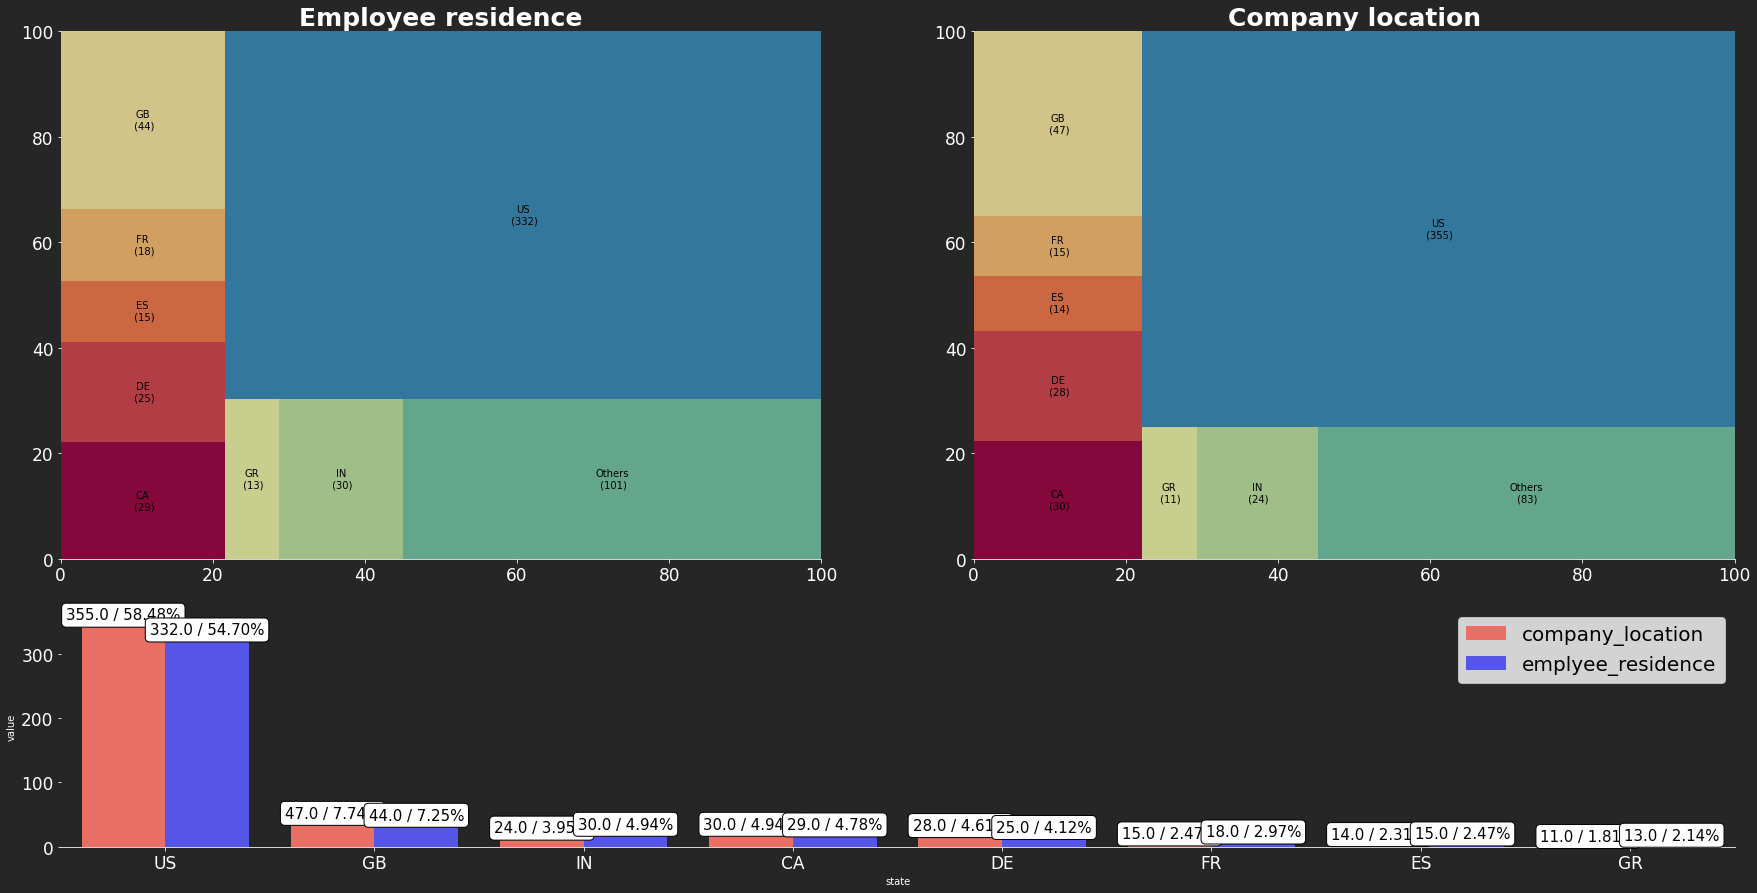

In [24]:
# Data --------------------------------------------------------------------------------
df_fig = d1.copy()
df_fig['employee_residence2'] = df_fig['employee_residence']
df_fig['company_location2'] = df_fig['company_location']
df_fig.loc[df_fig['employee_residence'].map(lambda x: x not in df_fig['employee_residence'].value_counts()[:8].index), 'employee_residence2'] = 'Others'
df_fig.loc[df_fig['company_location'].map(lambda x: x not in df_fig['company_location'].value_counts()[:8].index), 'company_location2'] = 'Others'

df_fig2 = pd.DataFrame(d1['employee_residence'].value_counts()).reset_index()
df_fig2.rename(columns={df_fig2.columns[0]:'state', df_fig2.columns[1]:'value'}, inplace=True)
df_fig2['type'] = 'emplyee_residence'
for s, v in d1['company_location'].value_counts().items():
    df_fig2.loc[df_fig2.shape[0]] = [s, v, 'company_location']
df_fig2 = df_fig2.sort_values('value', ascending=False)

# Setting 01 --------------------------------------------------------------------------------
# f, ax = plt.subplots(1, 2, figsize=(30, 10))
# f.set_facecolor(facecolor)
fig = plt.figure(figsize=(30, 15))
gs = fig.add_gridspec(3, 2)
ax = [fig.add_subplot(gs[:2,0]), fig.add_subplot(gs[:2,1]), fig.add_subplot(gs[2:,:])]
fig.set_facecolor(facecolor)

# Draw --------------------------------------------------------------------------------
for i, col in enumerate(['employee_residence2', 'company_location2']):
    t = df_fig.groupby(col).size().reset_index(name='counts')
    labels = t.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
    sizes = t['counts'].values.tolist()
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, ax=ax[i])

sns.barplot(data=df_fig2.iloc[:16], x='state', y='value', hue='type', palette=['#ff5b4d', '#3d3dff'], ax=ax[2])
for patch in ax[2].patches:
        x, height, width = patch.get_x(), patch.get_height(), patch.get_width()
        total_cnt = d1.shape[0]
        ax[2].text(x + width / 2, height + 5, f'{height} / {height / total_cnt * 100:2.2f}%', va='center', ha='center', size=15, bbox={'facecolor': 'white', 'boxstyle': 'round'})
    
    
# Setting 02 ----------------------------------------------------------------------
for a in ax:
    a.spines[['top', 'right', 'left']].set_visible(False)
    a.set_facecolor(facecolor)
    a.xaxis.label.set_color('white')  
    a.yaxis.label.set_color('white')
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')
    a.spines['left'].set_color('white')
    a.spines['bottom'].set_color('white') 
    a.tick_params(axis='x', labelsize=17)
    a.tick_params(axis='y', labelsize=17)
    
ax[0].set_title('Employee residence', fontweight='bold', size=25, color='white')
ax[1].set_title('Company location', fontweight='bold', size=25, color='white')
ax[2].legend(fontsize=20)

plt.show()

 Company size : 

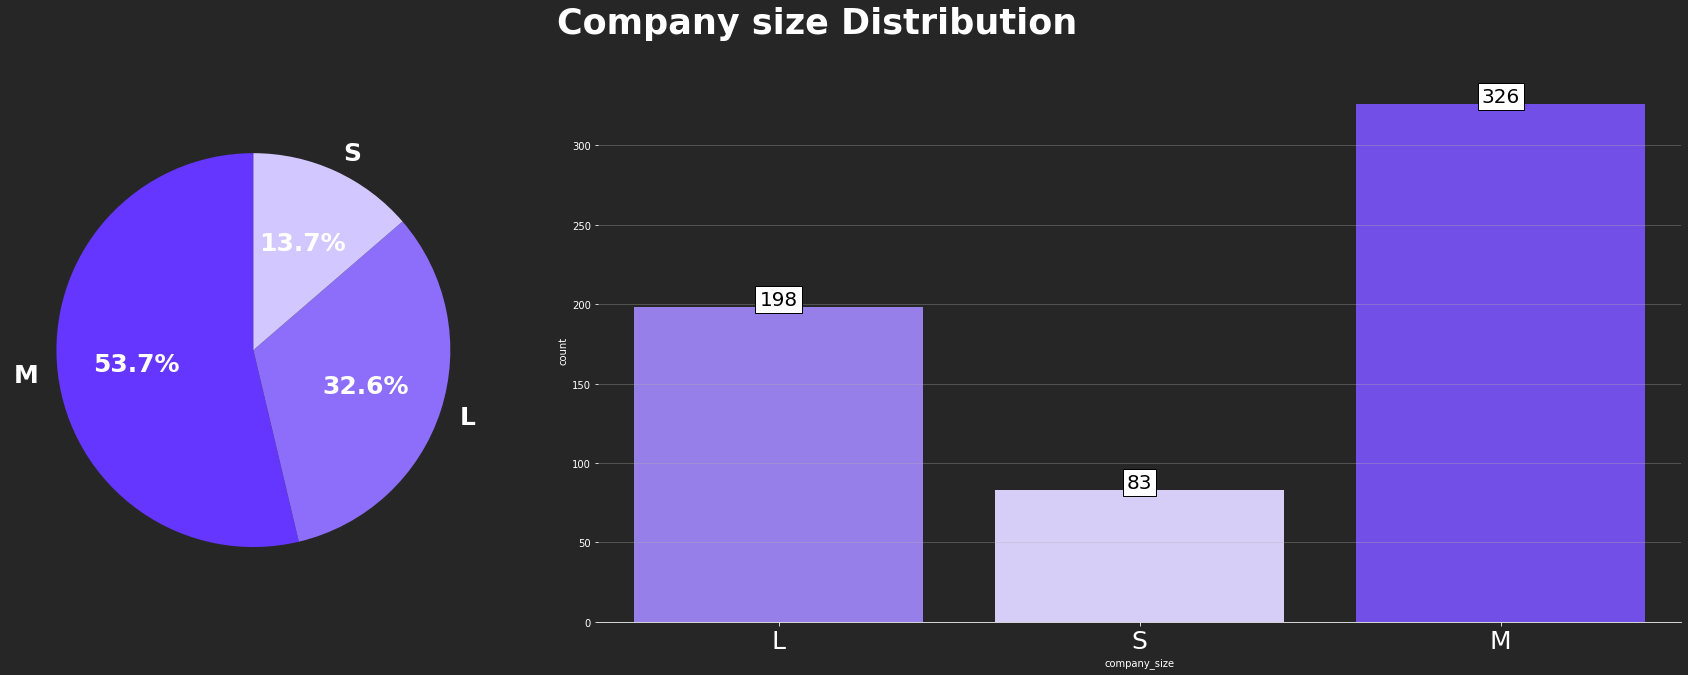

In [25]:
f = plt.figure(figsize=(30, 10))
gs = f.add_gridspec(1, 3)
ax = [f.add_subplot(gs[:, :1]), f.add_subplot(gs[:, 1:])]
f.set_facecolor(facecolor)

#----------------------------------------------------------

ax[0].pie(d1['company_size'].value_counts(), labels=['M', 'L', 'S'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 25, 'color': 'white', 'fontweight': 'bold'},
          colors=['#6536ff', '#8c6efa', '#d3c7ff'])

sns.countplot(d1['company_size'], ax=ax[1],
              palette=['#8c6efa', '#d3c7ff', '#6536ff'])
for patch in ax[1].patches:
    x, height, width = patch.get_x(), patch.get_height(), patch.get_width()
    ax[1].text(x + width / 2, height + 5, height, va='center',
               ha='center', size=20, bbox={'facecolor': 'white'})

#----------------------------------------------------------

for a in ax:
    a.spines[['top', 'right', 'left']].set_visible(False)
    a.set_facecolor(facecolor)
    a.xaxis.label.set_color('white')
    a.yaxis.label.set_color('white')
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')
    a.spines['left'].set_color('white')
    a.spines['bottom'].set_color('white')
    a.tick_params(axis='x', labelsize=25)
    a.grid(axis='y', linestyle='-', alpha=0.4)

f.suptitle('Company size Distribution', size=35,
           fontweight='bold', color='white')
plt.show()


Work year

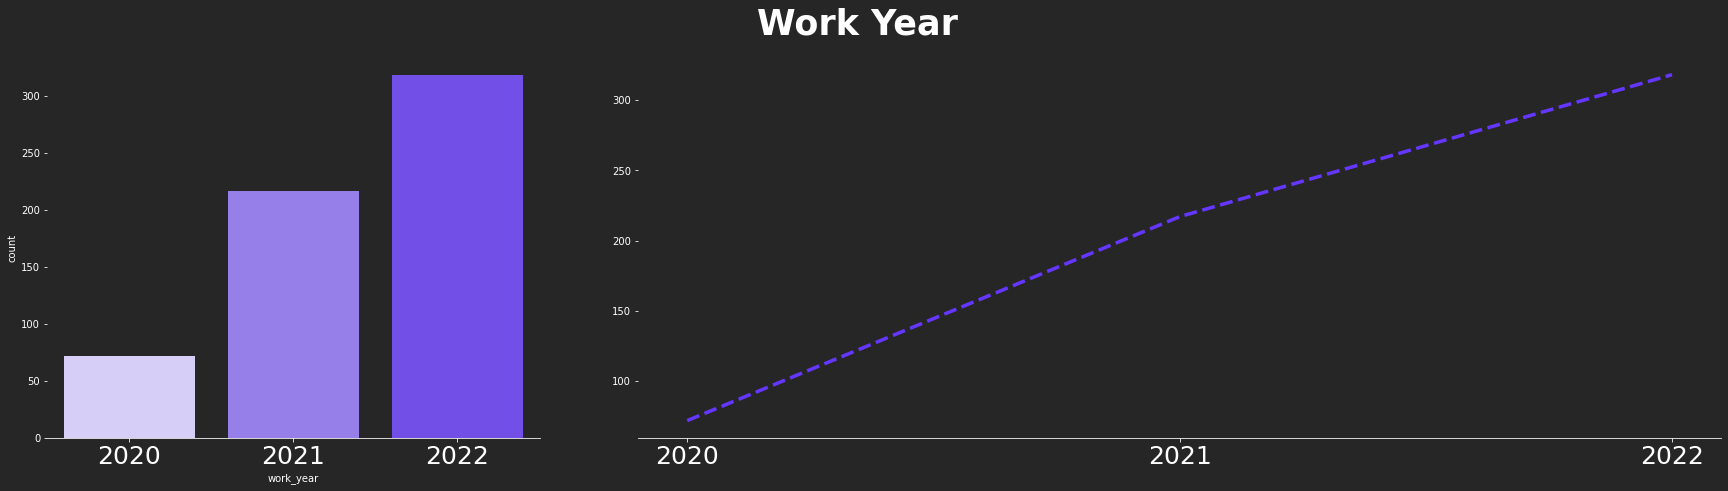

In [26]:
f = plt.figure(figsize=(30, 7))
gs = f.add_gridspec(1, 3)
ax = [f.add_subplot(gs[:, :1]), f.add_subplot(gs[:, 1:])]
f.set_facecolor(facecolor)

data = d1['work_year'].value_counts().sort_index()

sns.countplot(d1['work_year'], ax=ax[0],
                palette=['#d3c7ff', '#8c6efa', '#6536ff'])
sns.lineplot(x=data.index, y=data.values, ls='--',
                linewidth=3.5, ax=ax[1], color='#6536ff')

for a in ax:
        a.spines[['top', 'right', 'left']].set_visible(False)
        a.set_facecolor(facecolor)
        a.xaxis.label.set_color('white')
        a.yaxis.label.set_color('white')
        a.tick_params(axis='x', colors='white')
        a.tick_params(axis='y', colors='white')
        a.spines['left'].set_color('white')
        a.spines['bottom'].set_color('white')
        a.tick_params(axis='x', labelsize=25)

ax[1].xaxis.set_ticks([2020, 2021, 2022])
plt.suptitle('Work Year', size=35, fontweight='bold', color='white')

plt.show()


Salary in USD

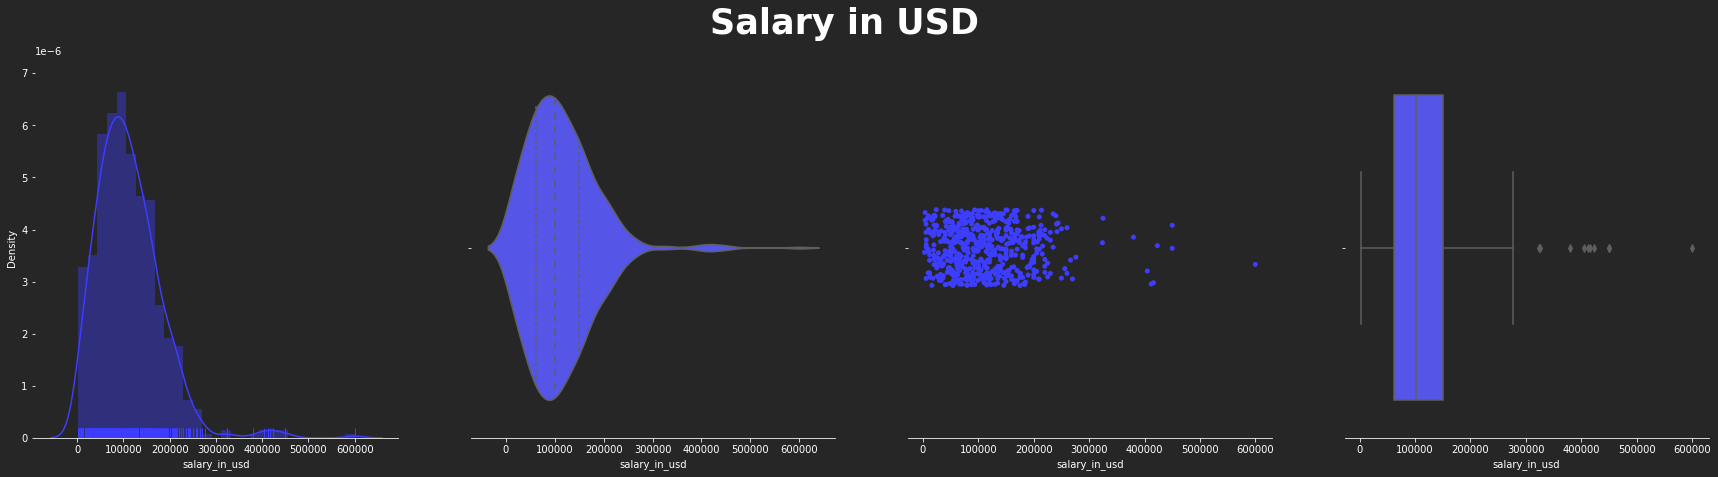

In [27]:
f, ax = plt.subplots(1, 4, figsize=(30, 7))
f.set_facecolor(facecolor)

sns.distplot(d1['salary_in_usd'], ax=ax[0], color='#3d3dff', rug=True)
sns.violinplot(d1['salary_in_usd'], ax=ax[1],
               color='#3d3dff', scale='width', inner='quartile')
sns.stripplot(d1['salary_in_usd'], ax=ax[2], color='#3d3dff')
sns.boxplot(d1['salary_in_usd'], ax=ax[3], color='#3d3dff')


for i in range(4):
    ax[i].spines[['top', 'right', 'left']].set_visible(False)
    ax[i].set_facecolor(facecolor)
    ax[i].xaxis.label.set_color('white')
    ax[i].yaxis.label.set_color('white')
    ax[i].tick_params(axis='x', colors='white')
    ax[i].tick_params(axis='y', colors='white')
    ax[i].spines['left'].set_color('white')
    ax[i].spines['bottom'].set_color('white')

f.suptitle('Salary in USD', color='white', size=35, fontweight='bold')

plt.show()


Salary Analysis

In [ ]:
# d5=d.copy()
d5


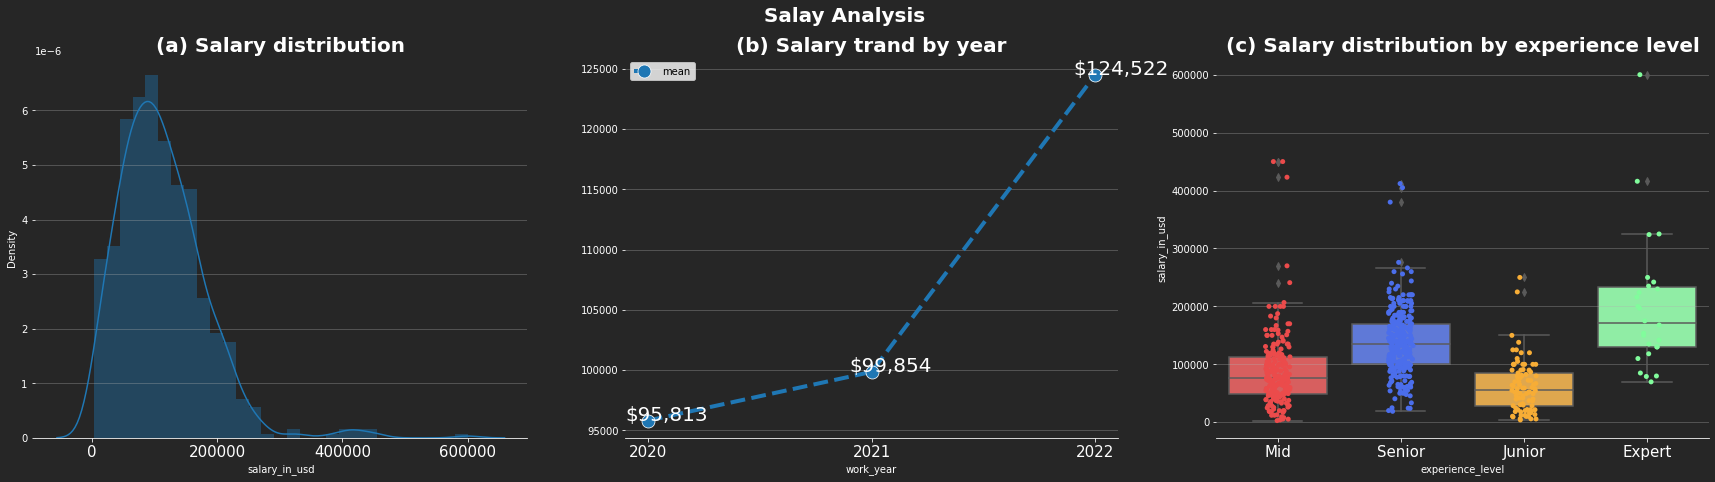

In [45]:
f, ax = plt.subplots(1, 3, figsize=(30, 7))
f.set_facecolor(facecolor)
colors = ['#eb4b4b', '#4b6eeb', '#f7ad36', '#81fc9c', '#cd43e6', '#ebe1ae']

#------------------------------------------------------------------------------------------

sns.distplot(d5['salary_in_usd'], ax=ax[0])

d_sal = d5.groupby('work_year')['salary_in_usd'].mean()
sns.lineplot(x=d1.index, y=d_sal.values,
             ax=ax[1], ls='--', linewidth=4, label='mean', marker='o', markersize=13)
[ax[1].annotate(f'${d_sal.values[i]:,.0f}', (d_sal.index[i]-0.1,
                d_sal.values[i]), size=20, color='white') for i in range(3)]
sns.boxplot(data=d5, x='experience_level',
            y='salary_in_usd', ax=ax[2], palette=colors)
sns.stripplot(data=d5, x='experience_level',
              y='salary_in_usd', ax=ax[2], palette=colors)

#------------------------------------------------------------------------------------------

for a in ax:
    a.spines[['top', 'right', 'left']].set_visible(False)
    a.set_facecolor(facecolor)
    a.xaxis.label.set_color('white')
    a.yaxis.label.set_color('white')
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')
    a.spines['left'].set_color('white')
    a.spines['bottom'].set_color('white')
    a.tick_params(axis='x', labelsize=15)
    a.grid(axis='y', linestyle='-', alpha=0.4)

#------------------------------------------------------------------------------------------

ax[0].set_title('(a) Salary distribution', color='white',
                fontweight='bold', size=20)
ax[0].xaxis.set_ticks([0, 200000, 400000, 600000])

ax[1].set_title('(b) Salary trand by year',
                color='white', fontweight='bold', size=20)
ax[1].xaxis.set_ticks([2020, 2021, 2022])

ax[2].set_title('(c) Salary distribution by experience level',
                color='white', fontweight='bold', size=20)

plt.suptitle('Salay Analysis', color='white', fontweight='bold', size=20)
plt.show()


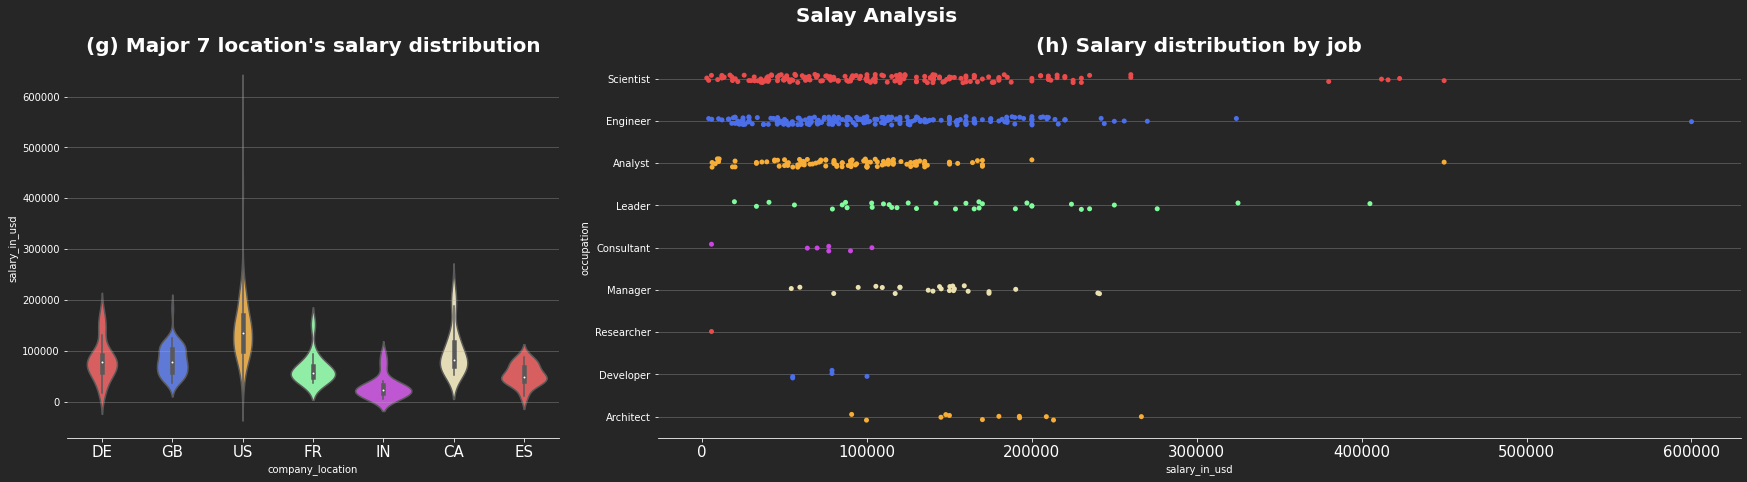

In [46]:
f = plt.figure(figsize=(30, 7))
gs = f.add_gridspec(1, 3)
ax = [f.add_subplot(gs[0, 0]), f.add_subplot(gs[0, 1:])]

f.set_facecolor(facecolor)
colors = ['#eb4b4b', '#4b6eeb', '#f7ad36', '#81fc9c', '#cd43e6', '#ebe1ae']

#------------------------------------------------------------------------------------------

major_location = d5['company_location'].value_counts()[:7].index
data = d5[d5['company_location'].map(
    lambda x: x in major_location)]
sns.violinplot(data=data, x='company_location',
               y='salary_in_usd', palette=colors, ax=ax[0])

sns.stripplot(data=d5, x='salary_in_usd',
              y='occupation', ax=ax[1], palette=colors)
#------------------------------------------------------------------------------------------

for a in ax:
    a.spines[['top', 'right', 'left']].set_visible(False)
    a.set_facecolor(facecolor)
    a.xaxis.label.set_color('white')
    a.yaxis.label.set_color('white')
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')
    a.spines['left'].set_color('white')
    a.spines['bottom'].set_color('white')
    a.tick_params(axis='x', labelsize=15)
    a.grid(axis='y', linestyle='-', alpha=0.4)

#------------------------------------------------------------------------------------------

ax[0].set_title("(g) Major 7 location's salary distribution",
                color='white', fontweight='bold', size=20)

ax[1].set_title("(h) Salary distribution by job",
                color='white', fontweight='bold', size=20)

plt.suptitle('Salay Analysis', color='white', fontweight='bold', size=20)
plt.show()


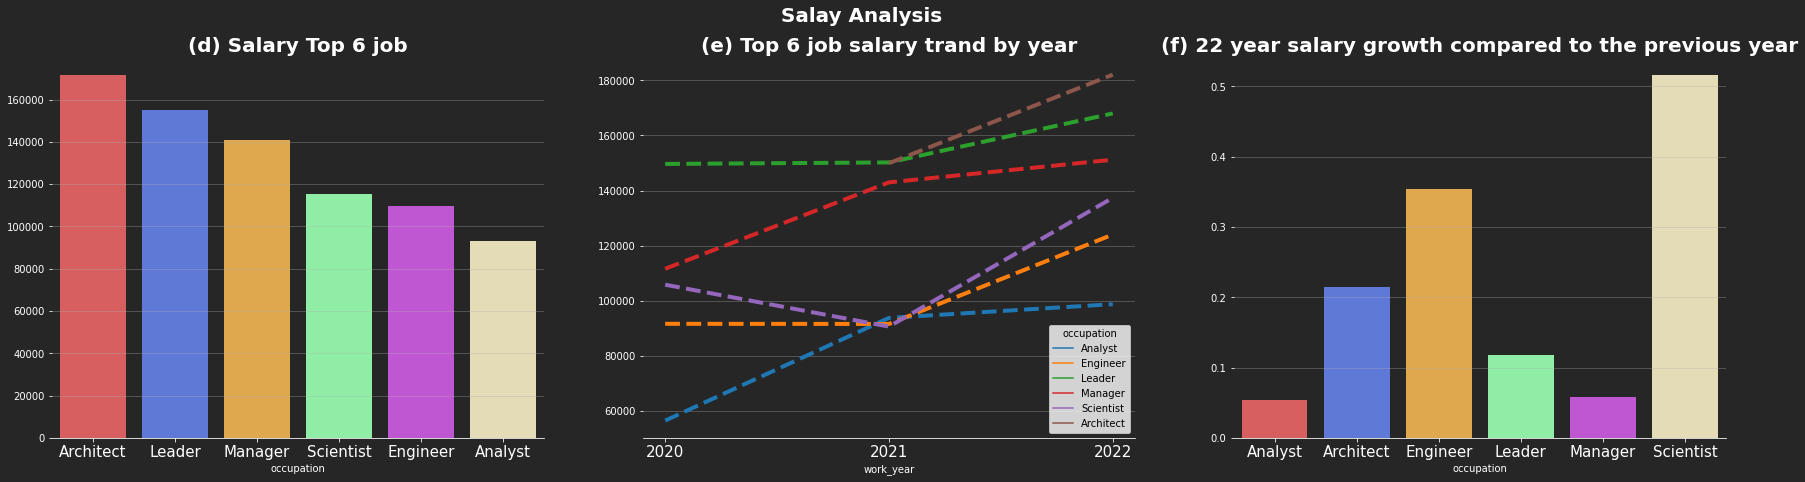

In [47]:
f, ax = plt.subplots(1, 3, figsize=(30, 7))
f.set_facecolor(facecolor)
colors = ['#eb4b4b', '#4b6eeb', '#f7ad36', '#81fc9c', '#cd43e6', '#ebe1ae']

#------------------------------------------------------------------------------------------

top6_job = d5.groupby('occupation')[
    'salary_in_usd'].mean().sort_values(ascending=False)[:6]
sns.barplot(x=top6_job.index, y=top6_job.values, ax=ax[0], palette=colors)

d2 = d5[d5['occupation'].map(lambda x: x in top6_job.index)]
d3 = d2.groupby(['work_year', 'occupation']).salary_in_usd.mean()
sns.lineplot(data=d3, x='work_year', y=d3.values,
             hue='occupation', ax=ax[1], ls='--', linewidth=4)

change_info = (d3[2022] - d3[2021]) / d3[2021]
sns.barplot(x=change_info.index, y=change_info.values,
            ax=ax[2], palette=colors)

#------------------------------------------------------------------------------------------

for a in ax:
    a.spines[['top', 'right', 'left']].set_visible(False)
    a.set_facecolor(facecolor)
    a.xaxis.label.set_color('white')
    a.yaxis.label.set_color('white')
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')
    a.spines['left'].set_color('white')
    a.spines['bottom'].set_color('white')
    a.tick_params(axis='x', labelsize=15)
    a.grid(axis='y', linestyle='-', alpha=0.4)

#------------------------------------------------------------------------------------------

ax[0].set_title('(d) Salary Top 6 job', color='white',
                fontweight='bold', size=20)

ax[1].set_title('(e) Top 6 job salary trand by year',
                color='white', fontweight='bold', size=20)
ax[1].xaxis.set_ticks([2020, 2021, 2022])

ax[2].set_title('(f) 22 year salary growth compared to the previous year',
                color='white', fontweight='bold', size=20)

plt.suptitle('Salay Analysis', color='white', fontweight='bold', size=20)
plt.show()
